# Titre

## Abstract

### Libraries

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit


from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


np.random.seed(42)

## First Research Question

In [65]:
#We generate a dataset with 4 features, and two features who are actually informative.

X,y,c = make_regression(n_samples=10000,
                        n_informative = 5,
                        coef=True,
                        random_state=0,
                       shuffle = False)

In [66]:
# Testing on generated data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

# Without PCA

In [67]:
reg = LinearRegression().fit(train_data, train_lbl)

In [68]:
reg.score(test_data,test_lbl)

1.0

# After PCA

In [69]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [70]:
pca = PCA(0.95)

x_pca = pca.fit(train_data)

x_pca = pca.transform(train_data)

x_pca_test = pca.transform(test_data)

In [71]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 1.22,  2.43,  3.64,  4.83,  6.01,  7.18,  8.34,  9.5 , 10.65,
       11.8 , 12.94, 14.08, 15.22, 16.35, 17.48, 18.6 , 19.72, 20.83,
       21.94, 23.05, 24.15, 25.25, 26.34, 27.43, 28.51, 29.59, 30.67,
       31.74, 32.81, 33.88, 34.95, 36.01, 37.07, 38.12, 39.17, 40.22,
       41.26, 42.3 , 43.33, 44.36, 45.39, 46.42, 47.44, 48.46, 49.47,
       50.48, 51.49, 52.5 , 53.5 , 54.5 , 55.5 , 56.49, 57.47, 58.45,
       59.43, 60.41, 61.38, 62.35, 63.32, 64.28, 65.24, 66.2 , 67.15,
       68.1 , 69.05, 69.99, 70.93, 71.87, 72.81, 73.74, 74.67, 75.59,
       76.51, 77.43, 78.35, 79.26, 80.17, 81.08, 81.98, 82.88, 83.77,
       84.66, 85.54, 86.42, 87.3 , 88.18, 89.05, 89.92, 90.78, 91.64,
       92.49, 93.34, 94.18, 95.02])

Score for 1 components: 0.0005705214230669053
Score for 2 components: 0.00035584870628035947
Score for 3 components: 0.023571499190471856
Score for 4 components: 0.023359434610668695
Score for 5 components: 0.02443669357914624
Score for 6 components: 0.03149410264569208
Score for 7 components: 0.035094648049767696
Score for 8 components: 0.07260602014776929
Score for 9 components: 0.08664723201918001
Score for 10 components: 0.08633785444965303
Score for 11 components: 0.08960646923467985
Score for 12 components: 0.08963053461725012
Score for 13 components: 0.09664226884023863
Score for 14 components: 0.1051615002921037
Score for 15 components: 0.14682711248434555
Score for 16 components: 0.16241545352730835
Score for 17 components: 0.20076450892248365
Score for 18 components: 0.20106848810194644
Score for 19 components: 0.2015205005988222
Score for 20 components: 0.2154508281086196


<function matplotlib.pyplot.show(close=None, block=None)>

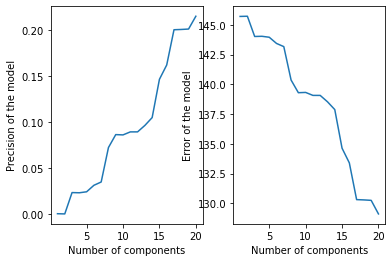

In [72]:
regr = LinearRegression()

scores = []
errors = []

for i in np.arange(1,21):
    regr.fit(x_pca[:,:i], train_lbl)
    
    score = regr.score(x_pca_test[:,:i],test_lbl)                                              
    print("Score for " + str(i) + " components: " + str(score))
    scores.append(score)
    
    pred = regr.predict(x_pca_test[:,:i])
    error = np.sqrt(mean_squared_error(test_lbl,pred))
    errors.append(error)    
    
plt.subplot(1,2,1)
plt.plot(np.arange(1,21),scores)
plt.xlabel('Number of components')
plt.ylabel('Precision of the model')


plt.subplot(1,2,2)
plt.plot(np.arange(1,21),errors)
plt.xlabel('Number of components')
plt.ylabel('Error of the model')

plt.show

## Real dataset

In [21]:
df_real = pd.read_csv ("real_estate.csv")

dataframe = pd.DataFrame(df_real)

dataframe

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [22]:
y=dataframe['Y house price of unit area']
X=dataframe.drop(['Y house price of unit area'],axis=1)

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

### Without PCA

In [23]:
reg = LinearRegression().fit(train_data, train_lbl)

reg.score(test_data,test_lbl)

0.6805241731225775

### With PCA

In [24]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [25]:
pca = PCA()

x_pca = pca.fit(train_data)

x_pca = pca.transform(train_data)

x_pca_test = pca.transform(test_data)

In [26]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.32,  53.89,  68.22,  81.75,  90.07,  97.96, 100.  ])

Score for 1 components: 0.5380915650446061
Score for 2 components: 0.5371738368290633
Score for 3 components: 0.6090101769909079
Score for 4 components: 0.6453503546018264
Score for 5 components: 0.6611166215846238
Score for 6 components: 0.65503094254166
Score for 7 components: 0.6805241731226012


<function matplotlib.pyplot.show(close=None, block=None)>

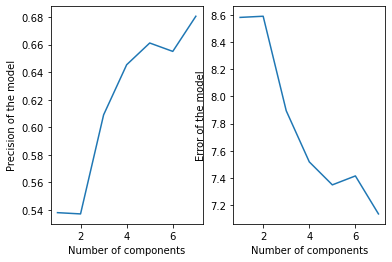

In [27]:
regr = LinearRegression()

scores = []
errors = []

for i in np.arange(1,8):
    regr.fit(x_pca[:,:i], train_lbl)
    
    score = regr.score(x_pca_test[:,:i],test_lbl)                                              
    print("Score for " + str(i) + " components: " + str(score))
    scores.append(score)
    
    pred = regr.predict(x_pca_test[:,:i])
    error = np.sqrt(mean_squared_error(test_lbl,pred))
    errors.append(error)    
    
plt.subplot(1,2,1)
plt.plot(np.arange(1,8),scores)
plt.xlabel('Number of components')
plt.ylabel('Precision of the model')


plt.subplot(1,2,2)
plt.plot(np.arange(1,8),errors)
plt.xlabel('Number of components')
plt.ylabel('Error of the model')

plt.show

## 

### PCA 
Principal Components Analysis (PCA) is a pre-processing technique that is used to reduce the dimension of a dataset. Reducing the dimension of a dataset can be useful for various reasons, for example: it reduces the learning time and the computational resources needed, it helps to reduce overfitting, it helps us to visualize the data. PCA is often used to pre-process data for classification problems. Here, we will use PCA on two Machine Learning models used for solving a regression problem. The benefits of using PCA on regression problems will also be evaluated. The algorithms we will use PCA on are: the linear regression model, and the multi-layered perceptron models.

#### Working of PCA
PCA works by finding Principal Components in the data.

The first step is to center de data around the origin and to fit a line trough it. To find the best fitting line, the sum of squared distances is used SS(distances). The best fitting line is the line with the largest SS(distances). This line is the first principal component. This line is a linear combination of features of the data. To find the next principal component, we fit a line trough the origin and it has to be perpendicular to the first principal component. We can find as much principal components as there are features in the dataset.

After all the principal components have been found, we can use their SS(distances), i.e their eigenvalues, to find the amount of variation that each principal components account for. When for example two principal components account for the majority of the variation, then we can use these two components to approximate the whole dataset. When these two principal components don't account for the majority of the variation, then this means that we would need more principal components to correctly represent the dataset.


## Applying PCA on regression algorithms

### Generated Dataset

In [28]:
#We generate a dataset with 4 features, and two features who are actually informative.

X,y,c = make_regression(n_samples=1000,n_features=4,
                        coef=True,
                        random_state=0)

In [29]:
# Testing on generated data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)


In [30]:
df_train = pd.DataFrame(train_data)

df_train

,0,1,2,3
0,-0.385490,-0.386871,0.183925,-0.510293
1,0.243168,0.457310,0.770837,0.962342
2,0.089620,-0.743228,-0.825779,-0.395222
3,0.797795,-0.102437,-0.070340,-0.619805
4,0.272796,0.026738,-0.470742,0.183450
...,...,...,...,...
852,-0.470024,0.242890,-1.021560,-0.400835
853,-0.277391,-0.363438,-1.509662,0.779051
854,1.081935,-0.346249,0.197967,-0.794636
855,-1.019251,1.951761,0.938585,1.239941


In [31]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [32]:
pca = PCA() #Apply PCA to reduce the data to two dimensions

pca.fit(train_data)

PCA()

In [33]:
pca.n_components

train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [34]:
pca.components_

array([[-0.58960459, -0.4489989 ,  0.29211461,  0.60451259],
       [ 0.44492701,  0.39599   ,  0.70318718,  0.38827782],
       [ 0.34664451, -0.73288321,  0.41908636, -0.40876205],
       [-0.57813837,  0.32322456,  0.49453359, -0.56277744]])

### Cross Validation

We will use the k-fold cross-validation method to analyze the performance of the models.

In [35]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []

## PCA with linear regression

In [36]:
reg = LinearRegression().fit(train_data, train_lbl)

In [37]:
reg.score(train_data, train_lbl)

1.0

In [38]:
reg.predict(test_data)

array([ 3.07520257e+01,  3.51968186e+01, -1.70300282e+02, -1.25923077e+02,
       -1.73608814e+02, -1.87316575e+02,  4.46325571e+01, -3.11810253e+02,
        4.58478007e+01,  3.16312424e+01,  2.06795965e+02, -1.10865807e+02,
       -9.27598274e+01, -1.92555537e+01, -8.50395786e+01, -1.20152832e+02,
       -8.52132708e+01,  1.08875432e+02, -5.22304642e+00, -1.63809199e+02,
       -5.70225928e+01,  6.41115052e+01, -3.95679426e+02,  4.20579593e+01,
       -2.19862047e+02, -3.17528646e+02, -1.09129380e+02,  1.10896552e+02,
        4.39235559e+01, -1.26743185e+02,  1.56246466e+02,  5.36601761e+01,
        6.66024006e+01,  1.73057308e+02, -2.57360859e+01,  3.17535415e+01,
        1.61798940e+02,  1.60476582e+02,  1.49602262e+01,  1.50791448e+02,
        7.11198806e+01,  1.85989485e+02, -7.55365756e+00, -4.25250618e+01,
        4.79163494e+01, -1.96583485e+02, -2.35526912e+02, -1.65133229e+00,
       -2.72606210e+00, -5.67228174e+01, -1.01194190e+02, -1.89519358e+02,
       -1.16989845e+02, -

In [39]:
reg.score(test_data,test_lbl)

1.0

#### Analyzing the components needed to accurately represent the data

Text(0.5, 1.0, 'hp')

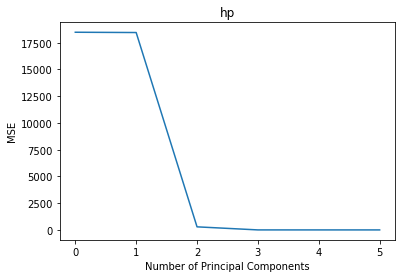

In [40]:
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(reg,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(reg,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

On this plot we can see that the 4 components are needed to get the mean squared error to be minimal. However, if there were features that did not account for much of the variance, these features could be left out. Therefore, we could represent the data accurately with less dimensions.

In [41]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 26.56,  52.43,  76.98, 100.01])

With the first principal component we can explain 25,75 % of the variance, when we add the second one we can explain 51,07 % of the variance, with the 3rd one 75,61% of the variance and with the 4th one, we can explain all the variance. This means that if we want to reduce the dimension of the data, we will lose a significant amount of information about the data.

In [42]:
# Function to perform PCA on the data and then use a regression model on the data.

def pcr(X,y,model,pc):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''

        # Define the PCA object
    pca = PCA()

    # Preprocessing : Standarsize the data
    
    Xstd = StandardScaler().fit_transform(X)

    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]

    ''' Step 2: regression on selected principal components'''

    # Create linear regression object
    regr = model

    # Fit
    regr.fit(Xreg, y)

    # Calibration
    y_c = regr.predict(Xreg)

    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

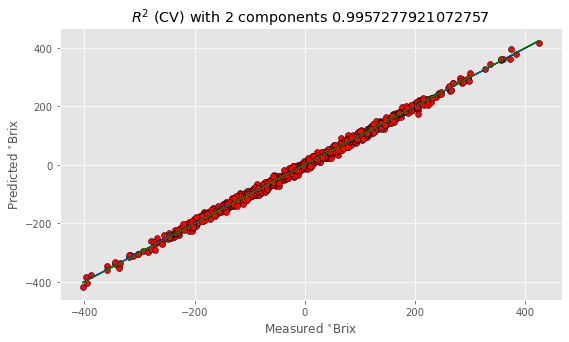

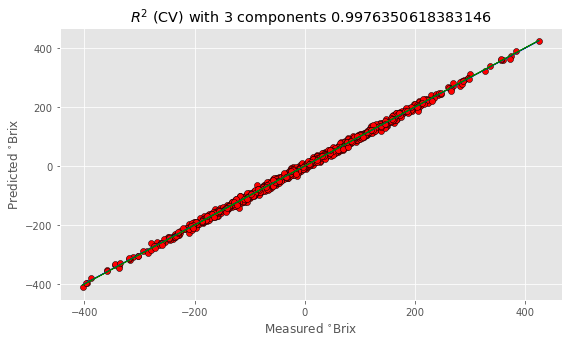

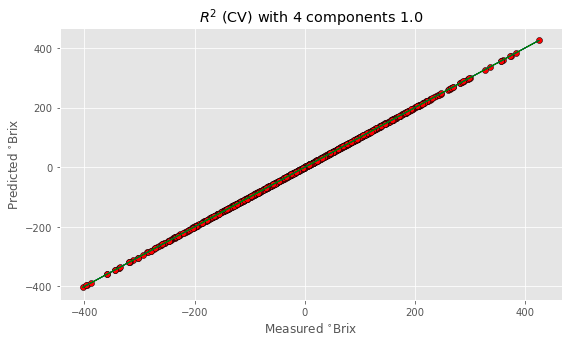

In [43]:
model = linear_model.LinearRegression()

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y,model, pc=i) # Compare with using only two components.

    # Regression plot
    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) with '+ str(i) +' components '+str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

On this plot we have a green line representing the correct correlation between the measured and the predicted values. The blue line represents the actual correlation after using PCA with two components. R² is a measure of how well the actual correlation after using PCA corresponds to the correct correlation. This means that after training on the dataset reduced to two dimensions, our algorithm will be accurately predict 72.2% of the times. The best possible value for R² is 100%, but 72,2% is not a bad value for R². This number could be increased if the first two principal components accounted for more of the total variance.

#### Without PCA

In [44]:
##TODO 

### 

## PCA with Multi layer perceptron regressor

In [45]:
regr = MLPRegressor()

regr.fit(train_data,train_lbl)

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor()

In [46]:
regr.score(test_data,test_lbl)

0.9669060807036697

### Analyzing the components needed to accurately represent the data

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

Text(0.5, 1.0, 'hp')

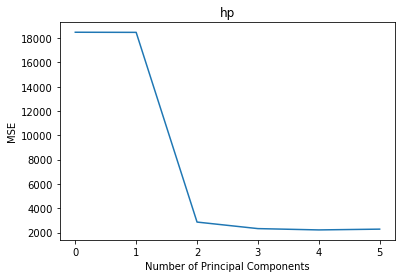

In [47]:
# Calculate MSE with only the intercept

mse = []

score = -1*model_selection.cross_val_score(regr,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

We can see that the MSE is minimal when we use 4 principal components. However, we will try to use 2 and see how our model will perform.

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

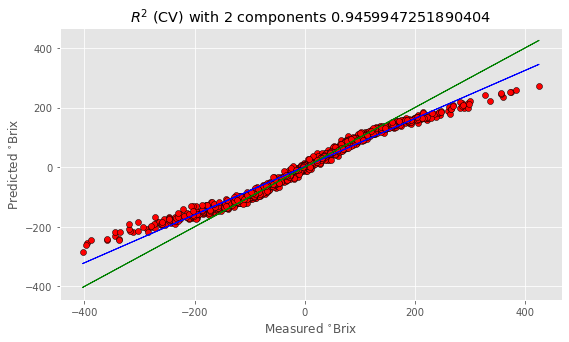

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

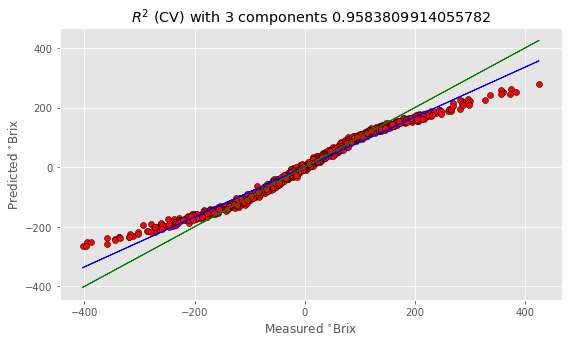

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

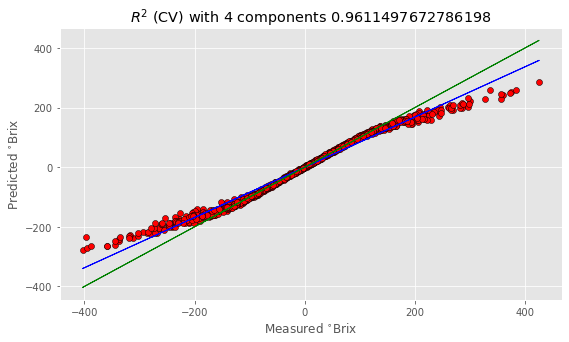

In [48]:
model = regr

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y,model, pc=i) # Compare with using only two components.

    # Regression plot
    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) with '+ str(i) +' components '+str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

Here, the result is similar as with the linear regression algorithm. The green line represents the actual correlation between the predicted values and the measured values, and the blue line represents the actual correlation found after using PCA with two components. The correlation between these two lines is 39.5%

With both algorithms we lose some information on the data by reducing the dimensions. The amount of data we lose can be reduced by using more principal components.

### Real dataset

In [51]:
df_real = pd.read_csv ("real_estate.csv")


dataframe = pd.DataFrame(df_real)

dataframe

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [52]:
y=dataframe['Y house price of unit area']
X=dataframe.drop(['Y house price of unit area'],axis=1)

In [53]:
# Split the data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

In [54]:
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [55]:
pca.fit(train_data)

train_data = pca.transform(train_data)
test_data = pca.transform(test_data)

In [56]:
reg = LinearRegression().fit(train_data, train_lbl)

Text(0.5, 1.0, 'hp')

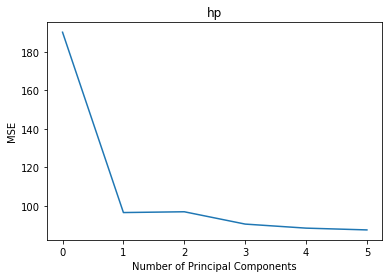

In [57]:
mse = []
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(reg,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(reg,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [58]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 38.32,  53.89,  68.22,  81.75,  90.07,  97.96, 100.  ])

This array tells us that by using 4 principal components, we can cover 81.75% of the variance. 

In [59]:
np.arange(2,5)

array([2, 3, 4])

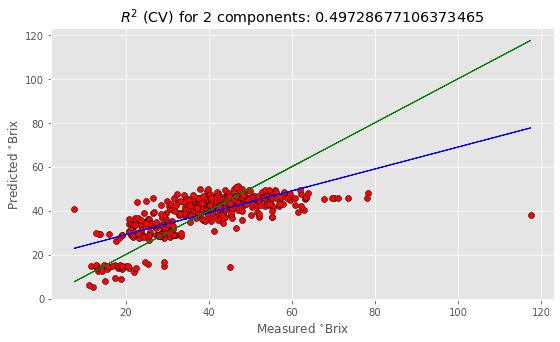

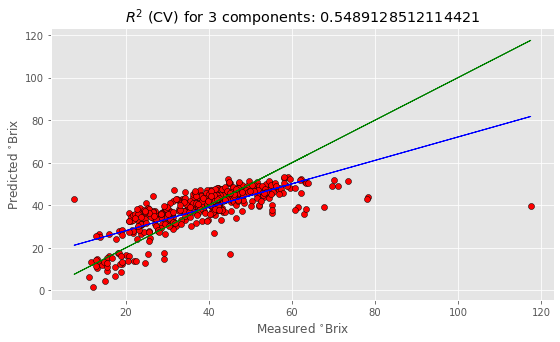

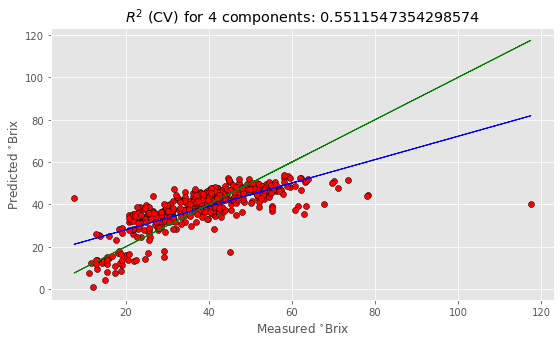

In [60]:
model = linear_model.LinearRegression()

for i in np.arange(2,5):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y, model, pc=i) # Compare with using only two components.

    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV) for '+ str(i) +' components: '  +str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()

Here again the goal is that the correlation between the green line and the blue line equals one. We see that with 2 principal components, the correlation is not great. However, when we add the third principal component, the correlation goes up to 1, which is almost perfect. This means that when we reduce the dimensions to 3 dimensions, the new dataset contains enough information such that the linear regression model is able to learn on it, as good as on the original dataset.

### MLP 

In [61]:
regr = MLPRegressor()

regr.fit(train_data,train_lbl)

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor()

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

Text(0.5, 1.0, 'hp')

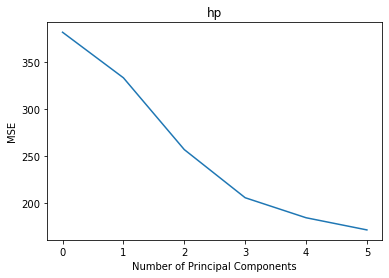

In [62]:
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(train_data),1)),train_lbl, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               train_data[:,:i], train_lbl, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

On this plot we see that, 4 principal components are necessary to accurately represent the data. This is because, when we use 4 principal components, the MSE is 0.

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

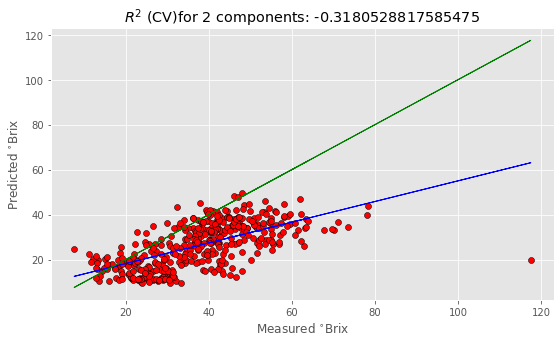

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

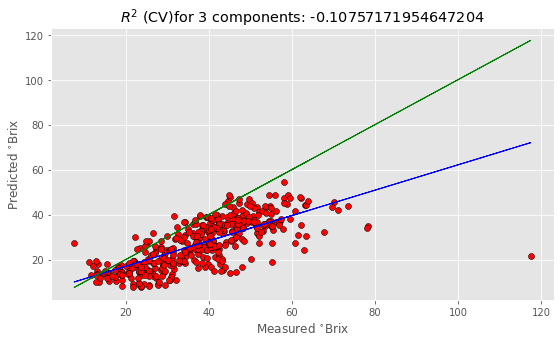

c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\n

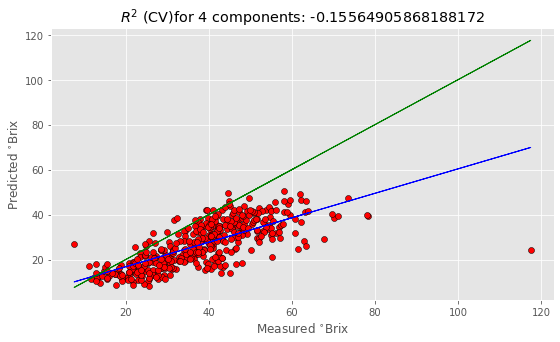

In [63]:

for i in np.arange(2,5):
    
    predicted, r2r, r2cv, mser, mscv = pcr(X,y, regr, pc=i) # Compare with using only two components.

    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV)for '+ str(i) +' components: ' +str(r2cv))
        plt.xlabel('Measured $^{\circ}$Brix')
        plt.ylabel('Predicted $^{\circ}$Brix')
        plt.show()
    

We see that the correlation in this example with the MLP regressor is negative. This means that the MLP regressor model is not able to learn the underlying target function correctly given the dataset after dimension reduction.

## Second Research Question : effect of dataset balance in label 0 and 1

In the second question, we focus on observing the effect of the balance of different classes, in the training and the test set. We analyse the trade-off between reducing the number of datapoints in the training points to balance the classes and thus reducing the number of training points and keeping a high number of training points in the dataset, regardless of the class unbalance.

### Real-world dataset study : the impact of unbalancing the training set and the trade-off with having as many as possible data points in the training set 

### The dataset

The dataset we have is composed of 3561 micro-calcifications of 96 patients that has/had cancer or not (specified in the last column with 0 : no cancer and 1 : cancer). Each micro-calcification has as first feature, the patient on who we observed it, then 150 different features measurable, and last but not least, a label indicating if the patient has/had cancer or not.

We load the data

In [ ]:
raw_data = pd.read_excel("data_breast_cancer.xlsx").to_numpy()

In [ ]:
print("Number of feature:",len(raw_data[0]))
print("Number of micro-calcification:", len(raw_data[:,0]))

Number of feature: 152
Number of micro-calcification: 3562


Separating our data from the label needed for supervised learning. We also discard the feature "patient" that won't be usefull in our study

In [ ]:
X, y = raw_data[:,1:(len(raw_data[0])-1)], raw_data[:,len(raw_data[0])-1:len(raw_data[0])]
y=y.ravel()
y

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
X_label_0,y_label_0 = X[y==0],y[y==0]
X_label_1,y_label_1 = X[y==1],y[y==1]

print("Number of label 0: ",len(y_label_0))
print("Number of label 1: ",len(y_label_1))

Number of label 0:  2020
Number of label 1:  1542


We see that we have an unbalance data, but not a lot of data points. The goal here is to test 3 configurations : 

* We balance the training dataset, and use 478 data points having label 0 for the test set. 
* We keep the same proportion of label 0 and 1 in the training and the test set, we keep a high number of data points 
* We do a trade-off between the two cases above

We will use as a model for learning the SVM Machine Learning algorithm

In [ ]:
def SVM(training_set,test_set,labels_training,labels_test):
    scaler = StandardScaler()
    scaler.fit(training_set)
    training_set_standardized = scaler.transform(training_set)
    model = SVC(gamma='auto')
    model.fit(training_set_standardized, labels_training.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = accuracy_score(labels_test,y_pred)
    score_false_negativ = 0
    for i in range(len(labels_test)):
        if labels_test[i] and not(y_pred[i]):
            score_false_negativ+=1
    return test_error,score_false_negativ,model

We setup global variables to record the results to plot them afterwards

In [ ]:
nb_dataset_studied = 3
accuracy_scores = np.zeros(nb_dataset_studied)
false_negativ_scores = np.zeros(nb_dataset_studied)

Above is written the learning algorithm for the three cases studied. We split the data in data with label 0 and 1, we take the proportion we want from each classfor the training and test set, then we shuffle everything and fit the SVM Model. We collect the test errors in a list and compare them in a table

We choose as error metrics, the accuracy score, a "false negativ score" which calculate the number of false negatives divided by the number of positive cases. 

In [ ]:
X_label_0_train, X_test, y_label_0_train, y_test = train_test_split(X_label_0,y_label_0,test_size=(len(y_label_0)-len(y_label_1))/len(y_label_0))
X_train = np.concatenate([X_label_0_train,X_label_1])
y_train = np.concatenate([y_label_0_train,y_label_1])

print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))


train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]
test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[0] = test_error
false_negativ_scores[0] = score_false_negativ


Numbers of label 0 in training set: 1542
Numbers of label 1 in training set: 1542
Numbers of label 0 in test set: 478
Numbers of label 1 in  test set: 0
Numbers of data points in training set: 3084
Numbers of data points in test set: 478


In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size=0.025)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size=0.025)
X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])


print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))

train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]

test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[1] = test_error
false_negativ_scores[1] = score_false_negativ/len(y_test[y_test==1])


Numbers of label 0 in training set: 1969
Numbers of label 1 in training set: 1503
Numbers of label 0 in test set: 51
Numbers of label 1 in  test set: 39
Numbers of data points in training set: 3472
Numbers of data points in test set: 90


In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size=0.15)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size=0.005)
X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])


print("Numbers of label 0 in training set:",len(y_train[y_train==0]))
print("Numbers of label 1 in training set:",len(y_train[y_train==1]))
print("Numbers of label 0 in test set:",len(y_test[y_test==0]))
print("Numbers of label 1 in  test set:",len(y_test[y_test==1]))
print("Numbers of data points in training set:",len(y_train))
print("Numbers of data points in test set:",len(y_test))

train_indexes = np.arange(len(X_train))
np.random.shuffle(train_indexes)
X_train = X_train[train_indexes]
y_train = y_train[train_indexes]

test_indexes = np.arange(len(X_test))
np.random.shuffle(test_indexes)
X_test = X_test[test_indexes]
y_test = y_test[test_indexes]

test_error,score_false_negativ,model = SVM(X_train,X_test,y_train,y_test)
accuracy_scores[2] = test_error
false_negativ_scores[2] = score_false_negativ/len(y_test[y_test==1])

Numbers of label 0 in training set: 1717
Numbers of label 1 in training set: 1534
Numbers of label 0 in test set: 303
Numbers of label 1 in  test set: 8
Numbers of data points in training set: 3251
Numbers of data points in test set: 311


In [ ]:
df = pd.DataFrame({"Accuracy scores":accuracy_scores,
                   "False negative score":false_negativ_scores}, 
                   index=["Balanced Train Dataset, eventhough having less data points in train set","Unbalanced Train Dataset, keeping same proportion of label 1 and 0 in both sets, havin many datapoints","Tradeoff between the first line and the second one"])
df

,Accuracy scores,False negative score
"Balanced Train Dataset, eventhough having less data points in train set",0.847280,0.000000
"Unbalanced Train Dataset, keeping same proportion of label 1 and 0 in both sets, havin many datapoints",0.777778,0.358974
Tradeoff between the first line and the second one,0.887460,0.250000


### Analyze

We observe that the third case performs the best according to the two error metrics, chosen. We could nuance this result, especially the false negativ scores, by saying the limited number of label 1 in the test set, but still, the way we calculte it allows us to be pretty confident about the two scores. We can deduce that having a balance training set is important for the performance of our model, but we cannot neglect its number of points : we need to keep it high to perform well, especially when the number of datapoints initially is limited. 

## Synthetic Dataset study : the impact of unbalancing the training set

We study the impact of an unbalanced data set, with number of training data points and number of test data points fixed. We assume that it is a symmetric problem : unbalancing labels 1 will be equivalent to unbalance labels 0.

We generate a synthetic dataset

Numbers of label 0 in set: 1500
Numbers of label 1 in set: 1500


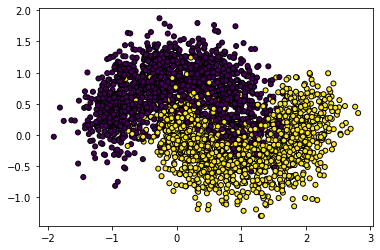

In [ ]:
from sklearn.datasets import make_moons

X_synth_data,y_synth_data =  make_moons(3000, noise=0.3, random_state=42)
X_label_0,y_label_0 = X_synth_data[y_synth_data==0],y_synth_data[y_synth_data==0]
X_label_1,y_label_1 = X_synth_data[y_synth_data==1],y_synth_data[y_synth_data==1]
number_synth_data = 50
models_synth_data = []
accuracy_scores_synth_data = np.zeros(number_synth_data)
false_negativ_scores_synth_data = np.zeros(number_synth_data)
plt.scatter(X_synth_data[:, 0], X_synth_data[:, 1], marker="o", c=y_synth_data, s=25, edgecolor="k")
print("Numbers of label 0 in set:",len(y_synth_data[y_synth_data==0]))
print("Numbers of label 1 in set:",len(y_synth_data[y_synth_data==1]))

In [73]:
## Helper function for visualization
def plot_decision_boundary(model, X, y):
    '''
    Plot the decision boundaries of a model trained on 2 dimensionnal data, as
    well as the scatter plot of the data X, using the target values in y for 
    the colors.
    ----------------------
    Input
            - model : Scikit-learn style estimator, already trained, must have
                    a .predict method
            - X : Data for scatter plot, must have 2 features.
            - y : Target classes for scatter plot colors
    '''
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole grid
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx1.shape)
    fig = plt.figure(figsize=(10,20))
    fig.suptitle('Visualization of model decision boundary')
    axs = fig.subplots(3, sharex=True, sharey=True)
    axs[0].contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
    axs[1].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    axs[2].contourf(xx1, xx2, Z, cmap=plt.cm.Spectral)
    axs[2].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Spectral)
    plt.show()

We train models on training sets taht are more or less unbalance : at the beginning we have a balance training set, and we slowly unbalance it to have at the end an unbalance dataset.

In [ ]:
for k in range(1,number_synth_data+1):
    factor_0 = (k-1)/(number_synth_data)*(0.001-0.2)
    factor_1 = (k-1)/(number_synth_data)*(0.399-0.2)
    X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_label_0, y_label_0, test_size= 0.2 + factor_0)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_label_1, y_label_1, test_size= 0.2 + factor_1)
    X_test,y_test = np.concatenate([X_test_0,X_test_1]),np.concatenate([y_test_0,y_test_1])
    X_train, y_train= np.concatenate([X_train_0,X_train_1]),np.concatenate([y_train_0,y_train_1])
    
    train_indexes = np.arange(len(X_train))
    np.random.shuffle(train_indexes)
    X_train = X_train[train_indexes]
    y_train = y_train[train_indexes]

    test_indexes = np.arange(len(X_test))
    np.random.shuffle(test_indexes)
    X_test = X_test[test_indexes]
    y_test = y_test[test_indexes]

    test_error_synth_data,score_false_negativ_synth_data,model_synth_data = SVM(X_train,X_test,y_train,y_test)
    models_synth_data.append(model_synth_data)
    accuracy_scores_synth_data[k-1] = test_error_synth_data
    if len(y_test[y_test==1]) !=0 :
        false_negativ_scores_synth_data[k-1] = score_false_negativ_synth_data/len(y_test[y_test==1])

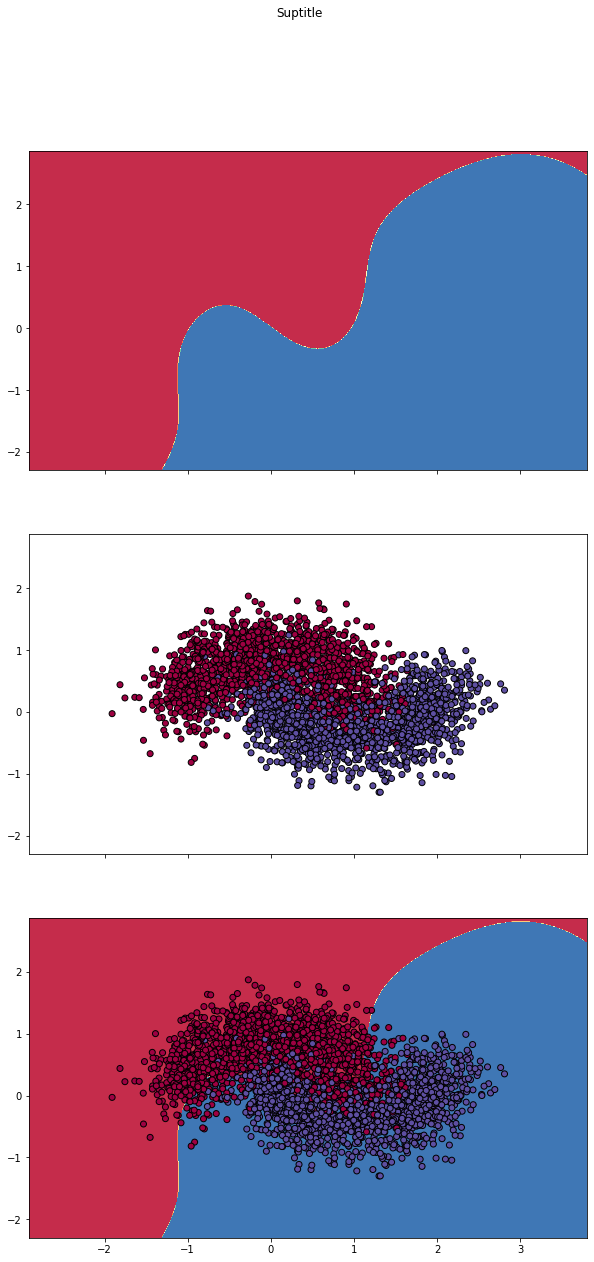

In [ ]:
#model we want between 0 and number_synth_data-1, feel free to vizualize the model you want !
index_model = 0
plot_decision_boundary(models_synth_data[index_model], X_synth_data, y_synth_data)

We plot the accuracy scores for each model

Text(0, 0.5, 'Accuracy score')

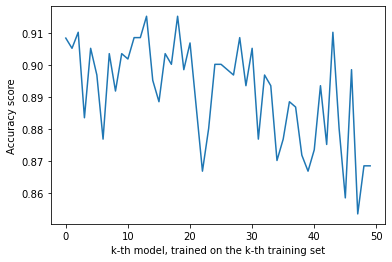

In [ ]:
plt.plot(accuracy_scores_synth_data)
plt.xlabel("k-th model, trained on the k-th training set")
plt.ylabel("Accuracy score")

We plot the false negative scores for each model

Text(0, 0.5, 'False negative score')

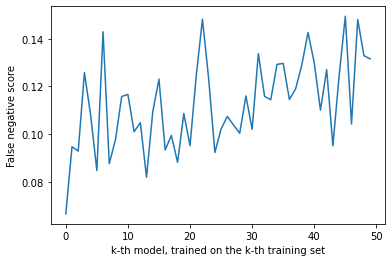

In [ ]:
plt.plot(false_negativ_scores_synth_data)
plt.xlabel("k-th model, trained on the k-th training set")
plt.ylabel("False negative score")

### Analyze

Even though the values are fluctuating a lot, we clearly see that the more is unbalance the training dataset, the less the models performs in terms of accuracy and false negative scores. We conclude on the importance of having a balance training dataset when fitting the model.

## Third Question Research : Benchmarking different Machine Learning models in terms of performance and execution time

In this research question, we try to answer these questions : what are the benefits and the drawbacks of using more complex models ? Is it necessary to use heavy models that take time to train and then to optimize when simpler models can achieve nearly the same but take less computational ressources ?
To adress them, we will benchmark different machine learning algorithms in terms of performance and execution time. We will do it on real-world datasets and synthetic datasets.

### Real-world datasets case

We load 3 different datasets : 

* First one is about covid, features contains symptoms and the values are yes or no (We do a little pre-processing step by encoding the values to 0 and 1).
* Second one is about predicting heart attacks
* Third one is about prediciting if Bill Clinton won a county using the demographic variables 

In [ ]:
real_data = pd.read_csv("covid_dataset.csv").to_numpy()

We encode the data

In [ ]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
for i in range(len(real_data[0])):
    real_data[:,i]=le.fit_transform(real_data[:,i])

print(real_data)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
X_real_data,y_real_data = real_data[:,:len(real_data[0])-1].astype(np.float64),real_data[:,len(real_data[0])-1].astype(np.float64)

In [ ]:
real_data_2 = pd.read_csv("heart.csv").to_numpy()
X_real_data_2,y_real_data_2 = real_data_2[:,:len(real_data_2[0])-1],real_data_2[:,len(real_data_2[0])-1]
y_real_data_2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
real_data_3 = pd.read_csv("election_dataset.csv").to_numpy()
real_data_3[:,-1] = le.fit_transform(real_data_3[:,-1])
real_data_3[:,-2] = le.fit_transform(real_data_3[:,-2])
X_real_data_3,y_real_data_3 = real_data_3[:,1:len(real_data_3[0])-1].astype(np.float64),real_data_3[:,len(real_data_3[0])-1].astype(np.float64)


In [ ]:
X_real_data_3[0]

array([3.1700e+01, 5.7623e+04, 1.5768e+04, 1.5200e+01, 1.0740e+01,
       5.1410e+01, 6.0400e+01, 2.3600e+00, 4.5700e+02, 0.0000e+00])

In [ ]:
print("number of label 0 real_data:",len(y_real_data[y_real_data==0]))
print("number of label 1 real_data:",len(y_real_data[y_real_data==1]))
print("number of label 0 real_data_2:",len(y_real_data_2[y_real_data_2==0]))
print("number of label 1 real_data_2:",len(y_real_data_2[y_real_data_2==1]))
print("number of label 0 real_data_3:",len(y_real_data_3[y_real_data_3==0]))
print("number of label 1 real_data_3:",len(y_real_data_3[y_real_data_3==1]))

number of label 0 real_data: 1051
number of label 1 real_data: 4383
number of label 0 real_data_2: 138
number of label 1 real_data_2: 165
number of label 0 real_data_3: 1220
number of label 1 real_data_3: 1193


We choose to do a train/validation, test split, and even if the real data is highly unbalanced we try to have the same proportion of label 0 and 1 in every set (regardless the results of research question 2, we are interested in comparing the performances of each models, not optimizing it)

For real data world 1

In [ ]:
X_train_rd_lb_0, X_valtest_rd_lb_0, y_train_rd_lb_0, y_valtest_rd_lb_0 = train_test_split(X_real_data[y_real_data==0],y_real_data[y_real_data==0], test_size=0.2)
X_val_rd_lb_0, X_test_rd_lb_0, y_val_rd_lb_0, y_test_rd_lb_0 = train_test_split(X_valtest_rd_lb_0,y_valtest_rd_lb_0, test_size=0.5)

In [ ]:
X_train_rd_lb_1, X_valtest_rd_lb_1, y_train_rd_lb_1, y_valtest_rd_lb_1 = train_test_split(X_real_data[y_real_data==1],y_real_data[y_real_data==1], test_size=0.2)
X_val_rd_lb_1, X_test_rd_lb_1, y_val_rd_lb_1, y_test_rd_lb_1 = train_test_split(X_valtest_rd_lb_1,y_valtest_rd_lb_1, test_size=0.5)

For real data world 2

In [ ]:
X_train_rd_2_lb_0, X_valtest_rd_2_lb_0, y_train_rd_2_lb_0, y_valtest_rd_2_lb_0 = train_test_split(X_real_data_2[y_real_data_2==0],y_real_data_2[y_real_data_2==0], test_size=0.2)
X_val_rd_2_lb_0, X_test_rd_2_lb_0, y_val_rd_2_lb_0, y_test_rd_2_lb_0 = train_test_split(X_valtest_rd_2_lb_0,y_valtest_rd_2_lb_0, test_size=0.5)

In [ ]:
X_train_rd_2_lb_1, X_valtest_rd_2_lb_1, y_train_rd_2_lb_1, y_valtest_rd_2_lb_1 = train_test_split(X_real_data_2[y_real_data_2==1],y_real_data_2[y_real_data_2==1], test_size=0.2)
X_val_rd_2_lb_1, X_test_rd_2_lb_1, y_val_rd_2_lb_1, y_test_rd_2_lb_1 = train_test_split(X_valtest_rd_2_lb_1,y_valtest_rd_2_lb_1, test_size=0.5)

For real data world 3

In [ ]:
X_train_rd_3_lb_0, X_valtest_rd_3_lb_0, y_train_rd_3_lb_0, y_valtest_rd_3_lb_0 = train_test_split(X_real_data_3[y_real_data_3==0],y_real_data_3[y_real_data_3==0], test_size=0.2)
X_val_rd_3_lb_0, X_test_rd_3_lb_0, y_val_rd_3_lb_0, y_test_rd_3_lb_0 = train_test_split(X_valtest_rd_3_lb_0,y_valtest_rd_3_lb_0, test_size=0.5)

In [ ]:
X_train_rd_3_lb_1, X_valtest_rd_3_lb_1, y_train_rd_3_lb_1, y_valtest_rd_3_lb_1 = train_test_split(X_real_data_3[y_real_data_3==1],y_real_data_3[y_real_data_3==1], test_size=0.2)
X_val_rd_3_lb_1, X_test_rd_3_lb_1, y_val_rd_3_lb_1, y_test_rd_3_lb_1 = train_test_split(X_valtest_rd_3_lb_1,y_valtest_rd_3_lb_1, test_size=0.5)

In [ ]:
X_train_rd = np.concatenate([X_train_rd_lb_0,X_train_rd_lb_1])
X_train_rd_2 = np.concatenate([X_train_rd_2_lb_0,X_train_rd_2_lb_1])
X_train_rd_3 = np.concatenate([X_train_rd_3_lb_0,X_train_rd_3_lb_1])


In [ ]:
y_train_rd = np.concatenate([y_train_rd_lb_0,y_train_rd_lb_1])
y_train_rd_2 = np.concatenate([y_train_rd_2_lb_0,y_train_rd_2_lb_1])
y_train_rd_3 = np.concatenate([y_train_rd_3_lb_0,y_train_rd_3_lb_1])

In [ ]:
X_val_rd = np.concatenate([X_val_rd_lb_0,X_val_rd_lb_1])
X_val_rd_2 = np.concatenate([X_val_rd_2_lb_0,X_val_rd_2_lb_1])
X_val_rd_3 = np.concatenate([X_val_rd_3_lb_0,X_val_rd_3_lb_1])

In [ ]:
y_val_rd = np.concatenate([y_val_rd_lb_0,y_val_rd_lb_1])
y_val_rd_2 = np.concatenate([y_val_rd_2_lb_0,y_val_rd_2_lb_1])
y_val_rd_3 = np.concatenate([y_val_rd_3_lb_0,y_val_rd_3_lb_1])

In [ ]:
X_test_rd = np.concatenate([X_test_rd_lb_0,X_test_rd_lb_1])
X_test_rd_2 = np.concatenate([X_test_rd_2_lb_0,X_test_rd_2_lb_1])
X_test_rd_3 = np.concatenate([X_test_rd_3_lb_0,X_test_rd_3_lb_1])

In [ ]:
y_test_rd = np.concatenate([y_test_rd_lb_0,y_test_rd_lb_1])
y_test_rd_2 = np.concatenate([y_test_rd_2_lb_0,y_test_rd_2_lb_1])
y_test_rd_3 = np.concatenate([y_test_rd_3_lb_0,y_test_rd_3_lb_1])

In [ ]:
train_indexes_rd  = np.arange(len(X_train_rd))
np.random.shuffle(train_indexes_rd)
X_train_rd = X_train_rd[train_indexes_rd]
y_train_rd  = y_train_rd[train_indexes_rd]

val_indexes_rd = np.arange(len(X_val_rd))
np.random.shuffle(val_indexes_rd)
X_val_rd = X_val_rd[val_indexes_rd]
y_val_rd = y_val_rd[val_indexes_rd]

test_indexes_rd = np.arange(len(X_test_rd))
np.random.shuffle(test_indexes_rd)
X_test_rd = X_test_rd[test_indexes_rd]
y_test_rd = y_test_rd[test_indexes_rd]

In [ ]:
train_indexes_rd_2  = np.arange(len(X_train_rd_2))
np.random.shuffle(train_indexes_rd_2)
X_train_rd_2 = X_train_rd_2[train_indexes_rd_2]
y_train_rd_2  = y_train_rd_2[train_indexes_rd_2]

val_indexes_rd_2 = np.arange(len(X_val_rd_2))
np.random.shuffle(val_indexes_rd_2)
X_val_rd_2 = X_val_rd_2[val_indexes_rd_2]
y_val_rd_2 = y_val_rd_2[val_indexes_rd_2]

test_indexes_rd_2 = np.arange(len(X_test_rd_2))
np.random.shuffle(test_indexes_rd_2)
X_test_rd_2 = X_test_rd_2[test_indexes_rd_2]
y_test_rd_2 = y_test_rd_2[test_indexes_rd_2]

In [ ]:
train_indexes_rd_3  = np.arange(len(X_train_rd_3))
np.random.shuffle(train_indexes_rd_3)
X_train_rd_3 = X_train_rd_3[train_indexes_rd_3]
y_train_rd_3  = y_train_rd_3[train_indexes_rd_3]

val_indexes_rd_3 = np.arange(len(X_val_rd_3))
np.random.shuffle(val_indexes_rd_3)
X_val_rd_3 = X_val_rd_3[val_indexes_rd_3]
y_val_rd_3 = y_val_rd_3[val_indexes_rd_3]

test_indexes_rd_3 = np.arange(len(X_test_rd_3))
np.random.shuffle(test_indexes_rd_3)
X_test_rd_3 = X_test_rd_3[test_indexes_rd_3]
y_test_rd_3 = y_test_rd_3[test_indexes_rd_3]

We create models without any tuning to "equaly" compare all the models 

In [ ]:
def SVM(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = SVC(gamma='auto')
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [ ]:
def PLA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = Perceptron()
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [ ]:
def PCA_PLA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    pca = PCA(0.9)
    pca.fit(train_set_standardized)
    train_set_transformed = pca.transform(train_set_standardized)
    model = Perceptron()
    model.fit(train_set_transformed, label_train_set.ravel())
    test_set_transformed = pca.transform(scaler.transform(test_set))
    y_pred = model.predict(test_set_transformed)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [ ]:
def Random_Forest(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    model = RandomForestClassifier()
    model.fit(train_set_standardized, label_train_set.ravel())
    test_set_standardized = scaler.transform(test_set)
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [ ]:
def Random_Forest_PCA(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    pca = PCA(0.9)
    pca.fit(train_set_standardized)
    train_set_transformed = pca.transform(train_set_standardized)
    model = RandomForestClassifier()
    model.fit(train_set_transformed,label_train_set.ravel())
    test_set_transformed = pca.transform(scaler.transform(test_set))
    y_pred = model.predict(test_set_transformed)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs

In [ ]:
def SVM_training_Cross_Validation(training_set,validation_set,test_set,labels_training,labels_validation,labels_test):
    kf = KFold(10)
    models_scores_val_SVC = []
    train_set = np.concatenate([training_set,validation_set])
    label_train_set = np.concatenate([labels_training,labels_validation])
    scaler = StandardScaler()
    scaler.fit(train_set)
    train_set_standardized = scaler.transform(train_set)
    for train_indexes, val_indexes in kf.split(train_set_standardized):
        model_temp = SVC(gamma='auto')
        model_temp.fit(train_set_standardized[train_indexes], label_train_set[train_indexes].ravel())
        #y_hat_train_temp = lin_reg_temp.predict(train_set_standardized[train_indexes])
        y_pred_temp = model_temp.predict(train_set_standardized[val_indexes])
        f1_score_temp = f1_score(label_train_set[val_indexes],y_pred_temp)

        score_false_negativ = 0
        y_folds = label_train_set[val_indexes]
        for i in range(len(label_train_set[val_indexes])):
            if y_folds[i] and not(y_pred_temp[i]):
                score_false_negativ+=1
        models_scores_val_SVC.append([model_temp,f1_score_temp,score_false_negativ])
    models_scores_val_SVC = np.array(models_scores_val_SVC)
    test_set_standardized = scaler.transform(test_set)
    model = models_scores_val_SVC[models_scores_val_SVC[:,1] == max(models_scores_val_SVC[:,1])][0][0]
    y_pred = model.predict(test_set_standardized)
    test_error = f1_score(labels_test,y_pred)
    score_false_negativ = 0
    nb_positivs = 0
    for i in range(len(labels_test)):
        if labels_test[i]:
            nb_positivs+=1
            if y_pred[i]:
                score_false_negativ+=1
    return test_error,score_false_negativ/nb_positivs
    

We define global variables to do the performance and the executing time tests. We choose to run only twice each test regarding the limit computational power of my computer, but feel free to modify the `num-runs` variable to do multiple time the tests and take the average result for performance and execution time.

In [ ]:
nb_models = 6
nb_rd_set = 3
f1_scores = np.zeros((nb_models,nb_rd_set))
false_negativ_scores = np.zeros((nb_models,nb_rd_set))
avg_durations = np.zeros((nb_models,nb_rd_set))
num_runs = 2
models = ["SVM","PLA","PCA_PLA","Random_Forest","Random_Forest_PCA","SVM_training_Cross_Validation"]

We set up the tests to do for each dataset with each model

In [ ]:
def test_time_SVM_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = SVM(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[0,1] += test_error/num_runs
    false_negativ_scores[0,1] += score_false_negativ/num_runs

def test_time_PLA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = PLA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[1,1] += test_error/num_runs
    false_negativ_scores[1,1] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[2,1] += test_error/num_runs
    false_negativ_scores[2,1] += score_false_negativ/num_runs

def test_time_Random_Forest_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[3,1] += test_error/num_runs
    false_negativ_scores[3,1] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[4,1] += test_error/num_runs
    false_negativ_scores[4,1] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd():
    global X_train_rd, X_val_rd, X_test_rd, y_train_rd, y_val_rd, y_test_rd, f1_scores, false_negativ_scores, num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd,X_val_rd,X_test_rd,y_train_rd,y_val_rd,y_test_rd)
    f1_scores[5,1] += test_error/num_runs
    false_negativ_scores[5,1] += score_false_negativ/num_runs


In [ ]:
def test_time_SVM_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[0,0] += test_error/num_runs
    false_negativ_scores[0,0] += score_false_negativ/num_runs

def test_time_PLA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PLA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[1,0] += test_error/num_runs
    false_negativ_scores[1,0] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[2,0] += test_error/num_runs
    false_negativ_scores[2,0] += score_false_negativ/num_runs

def test_time_Random_Forest_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[3,0] += test_error/num_runs
    false_negativ_scores[3,0] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[4,0] += test_error/num_runs
    false_negativ_scores[4,0] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd_2():
    global X_train_rd_2, X_val_rd_2, X_test_rd_2, y_train_rd_2, y_val_rd_2, y_test_rd_2, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd_2,X_val_rd_2,X_test_rd_2,y_train_rd_2,y_val_rd_2,y_test_rd_2)
    f1_scores[5,0] += test_error/num_runs
    false_negativ_scores[5,0] += score_false_negativ/num_runs


In [ ]:
def test_time_SVM_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[0,2] += test_error/num_runs
    false_negativ_scores[0,2] += score_false_negativ/num_runs

def test_time_PLA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PLA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[1,2] += test_error/num_runs
    false_negativ_scores[1,2] += score_false_negativ/num_runs

def test_time_PCA_PLA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[2,2] += test_error/num_runs
    false_negativ_scores[2,2] += score_false_negativ/num_runs

def test_time_Random_Forest_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[3,2] += test_error/num_runs
    false_negativ_scores[3,2] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = Random_Forest_PCA(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[4,2] += test_error/num_runs
    false_negativ_scores[4,2] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation_rd_3():
    global X_train_rd_3, X_val_rd_3, X_test_rd_3, y_train_rd_3, y_val_rd_3, y_test_rd_3, f1_scores, false_negativ_scores,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train_rd_3,X_val_rd_3,X_test_rd_3,y_train_rd_3,y_val_rd_3,y_test_rd_3)
    f1_scores[5,2] += test_error/num_runs
    false_negativ_scores[5,2] += score_false_negativ/num_runs


We execute the tests

In [ ]:
avg_durations[0,0]  += timeit.Timer(test_time_SVM_rd_2).timeit(number = num_runs)/num_runs
avg_durations[1,0]  += timeit.Timer(test_time_PLA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[2,0]  += timeit.Timer(test_time_PCA_PLA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[3,0]  += timeit.Timer(test_time_Random_Forest_rd_2).timeit(number = num_runs)/num_runs
avg_durations[4,0]  += timeit.Timer(test_time_Random_Forest_PCA_rd_2).timeit(number = num_runs)/num_runs
avg_durations[5,0]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd_2).timeit(number = num_runs)/num_runs

In [ ]:
avg_durations[0,1]  += timeit.Timer(test_time_SVM_rd).timeit(number = num_runs)/num_runs
avg_durations[1,1]  += timeit.Timer(test_time_PLA_rd).timeit(number = num_runs)/num_runs
avg_durations[2,1]  += timeit.Timer(test_time_PCA_PLA_rd).timeit(number = num_runs)/num_runs
avg_durations[3,1]  += timeit.Timer(test_time_Random_Forest_rd).timeit(number = num_runs)/num_runs
avg_durations[4,1]  += timeit.Timer(test_time_Random_Forest_PCA_rd).timeit(number = num_runs)/num_runs
avg_durations[5,1]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd).timeit(number = num_runs)/num_runs

In [ ]:
avg_durations[0,2]  += timeit.Timer(test_time_SVM_rd_3).timeit(number = num_runs)/num_runs
avg_durations[1,2]  += timeit.Timer(test_time_PLA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[2,2]  += timeit.Timer(test_time_PCA_PLA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[3,2]  += timeit.Timer(test_time_Random_Forest_rd_3).timeit(number = num_runs)/num_runs
avg_durations[4,2]  += timeit.Timer(test_time_Random_Forest_PCA_rd_3).timeit(number = num_runs)/num_runs
avg_durations[5,2]  += timeit.Timer(test_time_SVM_training_Cross_Validation_rd_3).timeit(number = num_runs)/num_runs

## Results

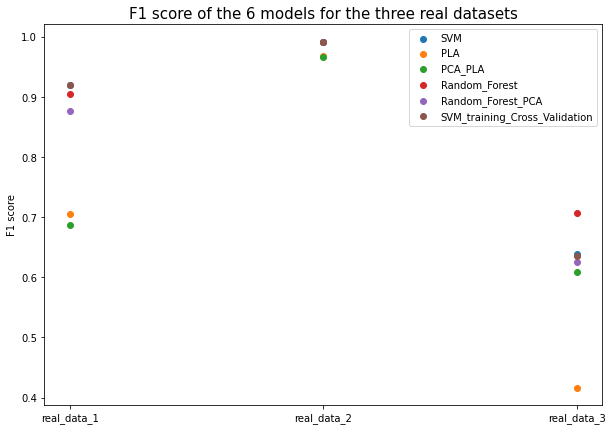

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("F1 score of the 6 models for the three real datasets", size=15)
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[0],label=models[0])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[1],label=models[1])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[2],label=models[2])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[3],label=models[3])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[4],label=models[4])
plt.scatter(["real_data_1","real_data_2","real_data_3"],f1_scores[5],label=models[5])
plt.ylabel("F1 score")
plt.legend()

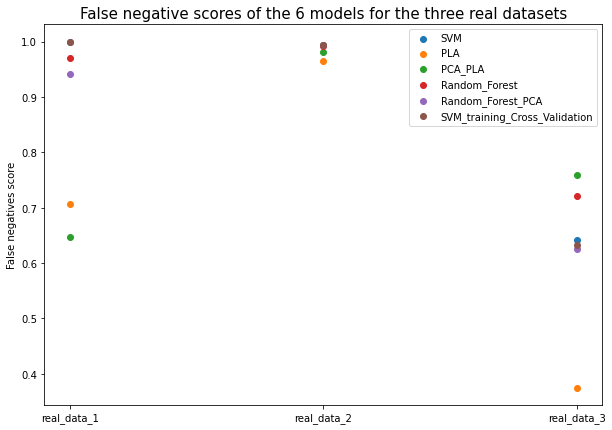

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("False negative scores of the 6 models for the three real datasets", size=15)
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[0],label=models[0])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[1],label=models[1])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[2],label=models[2])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[3],label=models[3])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[4],label=models[4])
plt.scatter(["real_data_1","real_data_2","real_data_3"],false_negativ_scores[5],label=models[5])
plt.ylabel("False negatives score")
plt.legend()

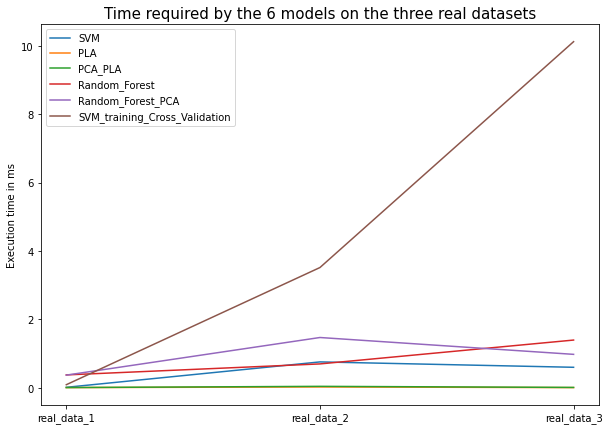

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("Time required by the 6 models on the three real datasets", size=15)
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[0],label=models[0])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[1],label=models[1])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[2],label=models[2])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[3],label=models[3])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[4],label=models[4])
plt.plot(["real_data_1","real_data_2","real_data_3"],avg_durations[5],label=models[5])
plt.ylabel("Execution time in ms")
plt.legend()

On the graphics representing the performance scores of each model, we can see that in general more complex models (SVM, SVM + Cross Validation, Random Forest and PCA + Random Forest) perfom better than the simpler ones (PLA and PCA+PLA), but the simpler models take less time to be executed. Goind into the details, we see that the Random Forest algorithm is a good trade-off : it performs really well when not taking that much of time. On the second dataset, we see that PCA PLA is not far from performing as well as the more complex models : here is a good example of maybe selecting this model instead the other ones, since it performs well, and not take a lot of computational ressources. Plus, we generalize much more using this model. 
At the end of the day, one should really care of what model to use and not rush directly into a complex model. 

## Synthetic dataset case 

We define the tests we want to do

In [ ]:
def test_time_SVM():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = SVM(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[0,k] += test_error/num_runs
    false_negativ_scores_synth_data[0,k] += score_false_negativ/num_runs

def test_time_PLA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = PLA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[1,k] += test_error/num_runs
    false_negativ_scores_synth_data[1,k] += score_false_negativ/num_runs

def test_time_PCA_PLA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = PCA_PLA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[2,k] += test_error/num_runs
    false_negativ_scores_synth_data[2,k] += score_false_negativ/num_runs

def test_time_Random_Forest():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = Random_Forest(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[3,k] += test_error/num_runs
    false_negativ_scores_synth_data[3,k] += score_false_negativ/num_runs

def test_time_Random_Forest_PCA():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs,k
    test_error,score_false_negativ = Random_Forest_PCA(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[4,k] += test_error/num_runs
    false_negativ_scores_synth_data[4,k] += score_false_negativ/num_runs

def test_time_SVM_training_Cross_Validation():
    global X_train, X_val, X_test, y_train, y_val, y_test, f1_scores_synth_data, false_negativ_scores_synth_data,num_runs
    test_error,score_false_negativ = SVM_training_Cross_Validation(X_train,X_val,X_test,y_train,y_val,y_test)
    f1_scores_synth_data[5,k] += test_error/num_runs
    false_negativ_scores_synth_data[5,k] += score_false_negativ/num_runs

We define global variables to collect the results of te different tests; In the loop, we create a synthetic data set, that gets bigger at each iteration, and we perform our tests, we collect the results and we plot them afterwards

In [ ]:
from sklearn.datasets import make_classification

nb_synth_data = 68
f1_scores_synth_data = np.zeros((nb_models,nb_synth_data))
false_negativ_scores_synth_data = np.zeros((nb_models,nb_synth_data))
avg_durations_synth_data = np.zeros((nb_models,nb_synth_data))

for k in range(nb_synth_data):
    
    X_synth_data,y_synth_data = make_classification((k+2)*10,n_classes=2)
    
    X_train_lb_0, X_valtest_lb_0, y_train_lb_0, y_valtest_lb_0 = train_test_split(X_synth_data[y_synth_data==0],y_synth_data[y_synth_data==0], test_size=0.2)
    X_val_lb_0, X_test_lb_0, y_val_lb_0, y_test_lb_0 = train_test_split(X_valtest_lb_0,y_valtest_lb_0, test_size=0.5)
    X_train_lb_1, X_valtest_lb_1, y_train_lb_1, y_valtest_lb_1 = train_test_split(X_synth_data[y_synth_data==1],y_synth_data[y_synth_data==1], test_size=0.2)
    X_val_lb_1, X_test_lb_1, y_val_lb_1, y_test_lb_1 = train_test_split(X_valtest_lb_1,y_valtest_lb_1, test_size=0.5)
    
    X_train = np.concatenate([X_train_lb_0,X_train_lb_1])
    X_val = np.concatenate([X_val_lb_0,X_val_lb_1])
    X_test = np.concatenate([X_test_lb_0,X_test_lb_1])
    y_train = np.concatenate([y_train_lb_0,y_train_lb_1])
    y_val = np.concatenate([y_val_lb_0,y_val_lb_1])
    y_test = np.concatenate([y_test_lb_0,y_test_lb_1])

    train_indexes = np.arange(len(X_train))
    np.random.shuffle(train_indexes)
    X_train = X_train[train_indexes]
    y_train = y_train[train_indexes]

    val_indexes = np.arange(len(X_val))
    np.random.shuffle(train_indexes)
    X_val = X_val[val_indexes]
    y_val = y_val[val_indexes]

    test_indexes = np.arange(len(X_test))
    np.random.shuffle(test_indexes)
    X_test = X_test[test_indexes]
    y_test = y_test[test_indexes]

    avg_durations_synth_data[0,k] = timeit.Timer(test_time_SVM).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[1,k] = timeit.Timer(test_time_PLA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[2,k] = timeit.Timer(test_time_PCA_PLA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[3,k] = timeit.Timer(test_time_Random_Forest).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[4,k] = timeit.Timer(test_time_Random_Forest_PCA).timeit(number = num_runs)/num_runs
    avg_durations_synth_data[5,k] = timeit.Timer(test_time_SVM_training_Cross_Validation).timeit(number = num_runs)/num_runs
    print(f'Synth Data {k} done')




c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Synth Data 0 done


c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\joeys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Synth Data 1 done
Synth Data 2 done
Synth Data 3 done
Synth Data 4 done
Synth Data 5 done
Synth Data 6 done
Synth Data 7 done
Synth Data 8 done
Synth Data 9 done
Synth Data 10 done
Synth Data 11 done
Synth Data 12 done
Synth Data 13 done
Synth Data 14 done
Synth Data 15 done
Synth Data 16 done
Synth Data 17 done
Synth Data 18 done
Synth Data 19 done
Synth Data 20 done
Synth Data 21 done
Synth Data 22 done
Synth Data 23 done
Synth Data 24 done
Synth Data 25 done
Synth Data 26 done
Synth Data 27 done
Synth Data 28 done
Synth Data 29 done
Synth Data 30 done
Synth Data 31 done
Synth Data 32 done
Synth Data 33 done
Synth Data 34 done
Synth Data 35 done
Synth Data 36 done
Synth Data 37 done
Synth Data 38 done
Synth Data 39 done
Synth Data 40 done
Synth Data 41 done
Synth Data 42 done
Synth Data 43 done
Synth Data 44 done
Synth Data 45 done
Synth Data 46 done
Synth Data 47 done
Synth Data 48 done
Synth Data 49 done
Synth Data 50 done
Synth Data 51 done
Synth Data 52 done
Synth Data 53 done
Sy

### Results

Feel free to comment some plots to visualize better the results for each model

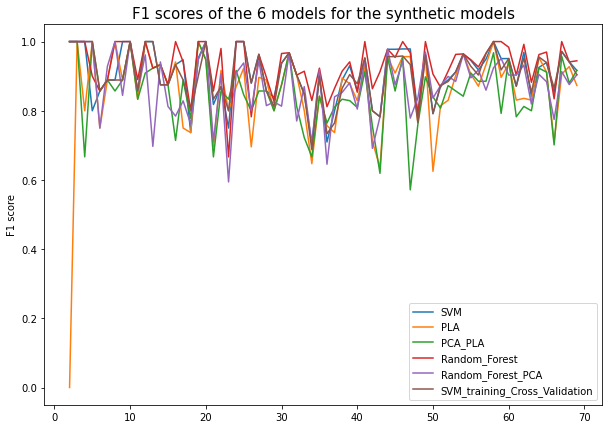

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("F1 scores of the 6 models for the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,f1_scores_synth_data[0],label=models[0])
plt.plot(index,f1_scores_synth_data[1],label=models[1])
plt.plot(index,f1_scores_synth_data[2],label=models[2])
plt.plot(index,f1_scores_synth_data[3],label=models[3])
plt.plot(index,f1_scores_synth_data[4],label=models[4])
plt.plot(index,f1_scores_synth_data[5],label=models[5])
plt.ylabel("F1 score")
plt.legend()

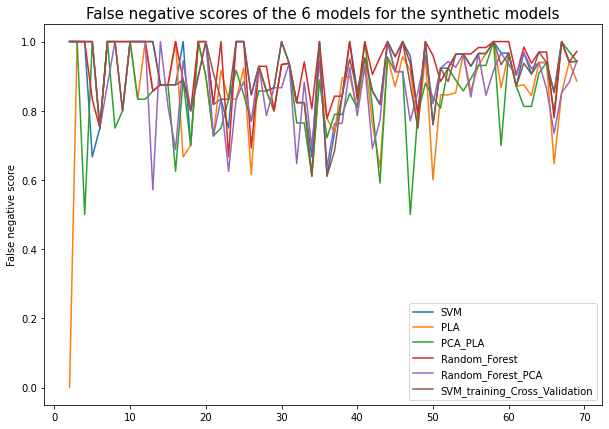

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("False negative scores of the 6 models for the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,false_negativ_scores_synth_data[0],label=models[0])
plt.plot(index,false_negativ_scores_synth_data[1],label=models[1])
plt.plot(index,false_negativ_scores_synth_data[2],label=models[2])
plt.plot(index,false_negativ_scores_synth_data[3],label=models[3])
plt.plot(index,false_negativ_scores_synth_data[4],label=models[4])
plt.plot(index,false_negativ_scores_synth_data[5],label=models[5])
plt.ylabel("False negative score")
plt.legend()

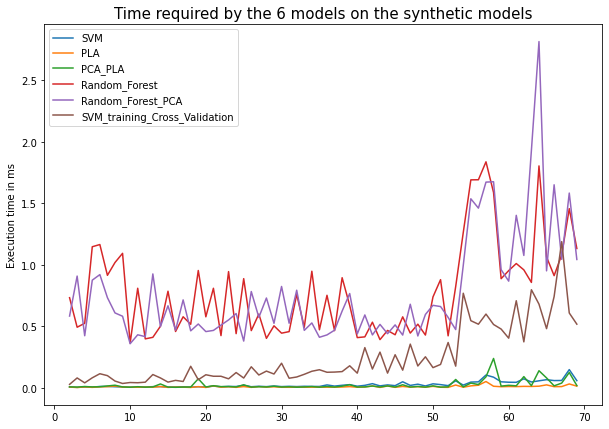

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.title("Time required by the 6 models on the synthetic models", size=15)
index = np.arange(2,70)
plt.plot(index,avg_durations_synth_data[0],label=models[0])
plt.plot(index,avg_durations_synth_data[1],label=models[1])
plt.plot(index,avg_durations_synth_data[2],label=models[2])
plt.plot(index,avg_durations_synth_data[3],label=models[3])
plt.plot(index,avg_durations_synth_data[4],label=models[4])
plt.plot(index,avg_durations_synth_data[5],label=models[5])
plt.ylabel("Execution time in ms")
plt.legend()

As before, complex models outperfom simpler models, even if they take less computational ressources. 
Going into more details, the Random Forest algorithm seems to be a good trade-off but also the SVM + Cross Validation, since the synthetic datasets generated are not very big. Adding a PCA step to the Random Forrest algorithm makes it heavier without gaining much more performance, maybe because the dimensional reducing step is useless even counter-productiv, since we do not have at the beginning a lot of features, so we take out important information for the Random Forrest algorithm to classify well the data. 

## References

Question research number 2

* https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py

* code provided by the Techniques of Artificial Intelligence WPO 5

Question research number 3

* https://www.realpythonproject.com/how-to-benchmark-functions-in-python/